In [ ]:
from dotenv import load_dotenv
from langchain_teddynote import logging

logging.langsmith("allforone")

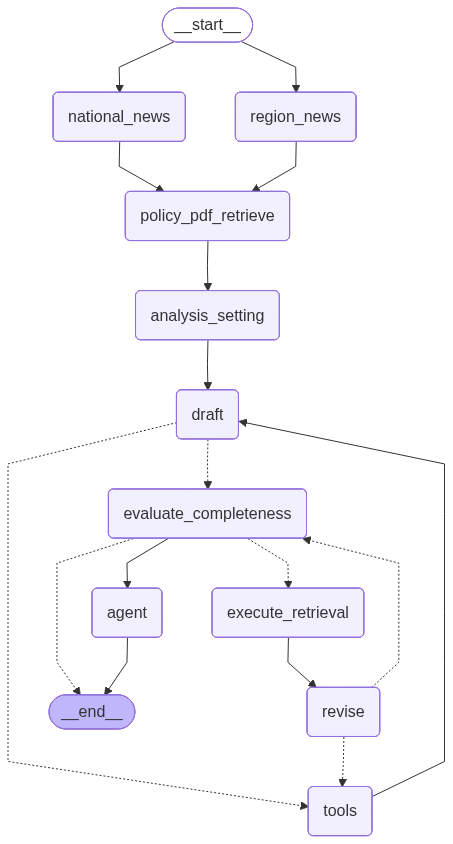

In [1]:
from agents.analysis.policy_agent import graph_builder
import json

graph = graph_builder.compile()
graph

In [2]:
from agents.analysis.policy_agent import policy_graph

invoke = await policy_graph.ainvoke(
    {
        "start_input": {
            "policy_period": "최근 1년",
            "policy_count": "2",
            "policy_list": "[2025.10.15, 2025.6.27]",
            "email": "immort0900@gmail.com",
            "target_area": "서울시 송파구 신천동",
            "total_units": "2275세대",
            "main_type": "84",
            "brand": "래미안아이파크",
        }
    }
)

📎 국가적_정책_모음_temp 링크: https://drive.google.com/uc?id=10tVtp-4X54F7MjBYeTJVASbgrJWvwrZn&export=download


C:\RAG_COMMANDER\src\tools\rag\vector_store.py:33: LangChainPendingDeprecationWarning: This class is pending deprecation and may be removed in a future version. You can swap to using the `PGVector` implementation in `langchain_postgres`. Please read the guidelines in the doc-string of this class to follow prior to migrating as there are some differences between the implementations. See <https://github.com/langchain-ai/langchain-postgres> for details about the new implementation.
  _pgvector_cache[collection_name] = PGVector(


In [ ]:
print(invoke)

In [3]:
output = invoke["policy_output"]

result_json = output["result"]

print("=" * 50)
print("📊 최종 분석 결과")
print("=" * 50)
print(result_json)

📊 최종 분석 결과
개요

2025.10.15 대책 (주택시장 안정화 대책, 2025-10-15)
- 배경: 6.27 대책 이후 가계부채 증가세 둔화에도 공급 불안 심리와 선매수 수요로 수도권 중심 가격 상승폭 확대, 기준금리 인하 기대 등으로 신규 주택구입 대출수요 잔존 [출처: 251015_대출수요 관리 강화 방안_주요 FAQ.pdf]
- 성격: 조정대상지역·투기과열지구 확대 지정, 토지거래허가구역 추가 지정, 주담대 한도 차등화·스트레스 금리 상향·전세대출 DSR 적용, 주담대 위험가중치 조기상향 [출처: 251015_주택시장_안정화_대책.pdf][출처: 251015_대출수요 관리 강화 방안_주요 FAQ.pdf]
- 시행 시점: 규제지역 2025-10-16, 토지거래허가구역 2025-10-20~2026-12-31, 주담대 한도 차등화·스트레스 금리 2025-10-16, 전세대출 DSR 2025-10-29, 위험가중치 하한 20% 2026-01-01 [출처: 251015_주택시장_안정화_대책.pdf]

2025.06.27 대책 (가계부채 관리 강화 방안, 2025-06-27)
- 배경: 토지거래허가제 일시 해제와 금리 인하 기대 등으로 4~6월 가계대출, 특히 수도권 주담대 증가 확대 [출처: 0627.pdf]
- 성격: 수도권·규제지역 중심 주담대 한도(6억원)·만기(30년)·전입의무(6개월) 강화, 다주택자 추가구입 LTV 0%, 생활안정자금 한도 설정, 전세·신용대출 관리, 정책대출 한도 축소·총량관리 [출처: 0627.pdf]
- 시행 시점: 2025-06-28 주요 조치, 전세보증비율 2025-07-21 [출처: 0627.pdf]


정책 목표

2025.10.15 대책
- 과열지역 규제지역 확대(서울 25개 전역, 경기 12개)로 수요 억제 및 대출규제 자동강화 유도 [출처: 251015_주택시장_안정화_대책.pdf]
- 주담대 한도 차등화·스트레스 금리 상향 및 전세대출 DSR 도입으로 신규 차입수요 둔화 [출처: 251015_주택시장_안정화_

In [ ]:
print("=" * 80)
print("🔍 전체 상태 디버깅")
print("=" * 80)

# 1. invoke에 어떤 키들이 있는지 확인
print("\n📋 사용 가능한 키:")
print(list(invoke.keys()))

# 2. policy_output이 있는지 확인
if "policy_output" in invoke:
    print("\n✅ policy_output 존재")
    output = invoke["policy_output"]
    print("  policy_output 키:", list(output.keys()))
    
    # result 내용 확인
    if "result" in output:
        result = output["result"]
        print(f"\n  result 타입: {type(result)}")
        print(f"  result 길이: {len(str(result))}")
        print(f"  result 내용 (처음 500자):\n{str(result)[:500]}")
else:
    print("\n❌ policy_output 없음")

# 3. report_draft 확인
if "report_draft" in invoke:
    print(f"\n📝 report_draft 길이: {len(invoke['report_draft'])}")
    print(f"report_draft 내용 (처음 500자):\n{invoke['report_draft'][:500]}")
else:
    print("\n❌ report_draft 키 없음")

# 4. 완성도 체크 확인
if "completeness_check" in invoke:
    check = invoke["completeness_check"]
    print(f"\n✅ 완성도 체크:")
    print(f"  is_complete: {check.is_complete}")
    print(f"  missing_sections: {check.missing_sections}")
else:
    print("\n❌ completeness_check 없음")

# 5. iteration 확인
if "iteration" in invoke:
    print(f"\n🔄 반복 횟수: {invoke['iteration']}")

In [ ]:
# LLM 응답 확인
print("=" * 80)
print("💬 LLM 메시지 히스토리 확인")
print("=" * 80)

messages = invoke.get("messages", [])
print(f"\n총 메시지 개수: {len(messages)}")

# 마지막 몇 개 메시지 확인
for idx, msg in enumerate(messages[-5:], start=len(messages)-4):
    print(f"\n[메시지 {idx}]")
    print(f"타입: {type(msg).__name__}")
    
    # AIMessage인 경우
    if hasattr(msg, 'content'):
        content = msg.content
        print(f"내용 길이: {len(str(content))}")
        print(f"내용 (처음 500자):\n{str(content)[:500]}")
        
        # tool_calls 확인
        if hasattr(msg, 'tool_calls') and msg.tool_calls:
            print(f"Tool calls: {len(msg.tool_calls)}개")
            for tool_call in msg.tool_calls[:3]:
                print(f"  - {tool_call.get('name', 'unknown')}")
    
    print("-" * 80)

## 검색 성능 테스트

policy_pdf_retriever의 검색 정확도를 테스트합니다.

- 셀 6: 간단한 쿼리 입력 테스트 (결과 확인)
- 셀 7: 전문적인 RAG 정확도 테스트 (키워드 매칭, 파일 매칭 정확도 측정)


In [ ]:
print("=" * 50)
print("🔍 Gemini 검색 결과")
print("=" * 50)
print(output["gemini_search"])

In [ ]:
print("=" * 50)
print("📍 카카오 API 위치 정보")
print("=" * 50)
print(json.dumps(output["kakao_api_distance_context"], ensure_ascii=False, indent=2))

In [ ]:
print("=" * 50)
print("🌐 Perplexity 검색 결과")
print("=" * 50)
print(output["perplexity_search"])